In [229]:
#loading modules 
import os 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

This project tries to analyze a breast cancer data set and is used as a learning project for me.
Link to the dataset and its respective authors https://www.kaggle.com/datasets/deeplearner09/breast-cancer-dataset

In [230]:
#loading and analyzing data set

df = pd.read_csv("C:\\Users\Leon\\Desktop\\Data Science\\Breast_cancer_alkan\\Breast_cancer_data.csv")
df.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


given the data set and the nature of the topic, we naturally assume the mean_radius to be the dominant factor
for determining the diagnosis. Further we can also see that the mean_radius, mean_perimeter and mean_area have to be strongly
correlated with one another, since they are all geometrically linked.
therefore the only true two other variables are mean_texture and mean_smoothness.
therefore we have to take a look on both of them and maybe see a pattern here

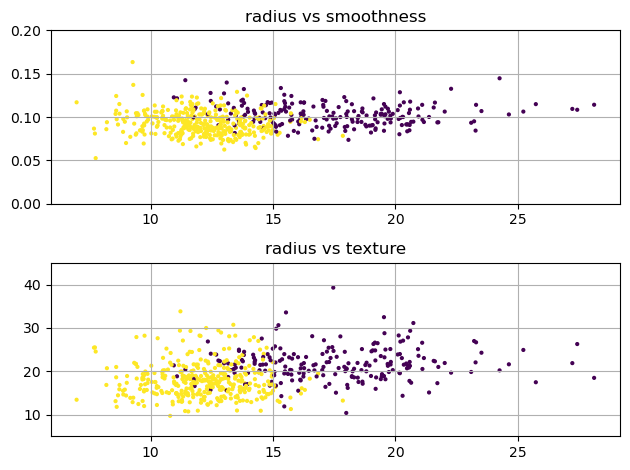

In [231]:
fig,ax = plt.subplots(2,1)
ax[0].scatter(df["mean_radius"],df["mean_smoothness"],s=4,c=df["diagnosis"])
ax[1].scatter(df["mean_radius"],df["mean_texture"],s=4, c =df["diagnosis"])
ax[0].set_title('radius vs smoothness')
ax[1].set_title('radius vs texture')
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_ylim([0,0.2])
ax[1].set_ylim([5,45])
fig.tight_layout()

just to check whether or not the radius and other geometrical information corresponds more strongly

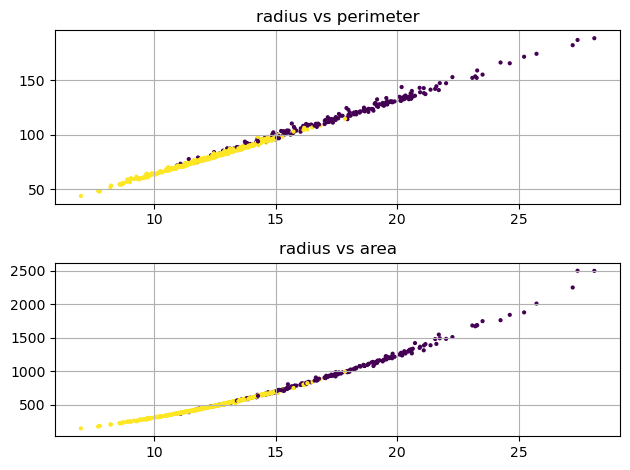

In [232]:
fig,ax = plt.subplots(2,1)
ax[0].scatter(df["mean_radius"],df["mean_perimeter"],s=4,c=df["diagnosis"])
ax[1].scatter(df["mean_radius"],df["mean_area"],s=4, c =df["diagnosis"])
ax[0].set_title('radius vs perimeter')
ax[1].set_title('radius vs area')
ax[0].grid(True)
ax[1].grid(True)
fig.tight_layout()

Obviously we see the suspected correlations. linear for radius vs perimeter and quadratic for radius vs area
also there seems to be a high overlap, however this also appears when using smoothness and texture, therefore we want to take a look
in 3D

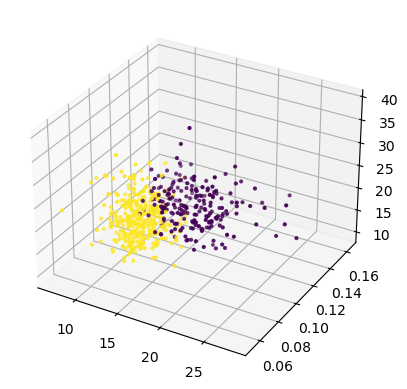

In [233]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df["mean_radius"],df["mean_smoothness"],df["mean_texture"],s=4,c = df["diagnosis"])

Here again we see the same pattern as in the first two plots of this project. Since "mean_radius", "mean_texture" and "mean_smoothness"
show the most statistical noise, they seem less prone to overfitting. Equally as mentioned before, the radius, perimeter and area are all
mathematically linked to one another and therefore adding these two to the algorithm will have the least impact on the accuracy of the prediction

Furthermore, since the diagnosis is a simple binary variable, we therefore want to start using a simple logistic regression 


In [234]:
# creating the training and testing datasets with a test sample size of 20%
x_1_train,x_1_test,y_1_train,y_1_test=train_test_split(np.array(df["mean_radius"]).reshape(-1,1),df["diagnosis"],test_size=0.2)
x_2_train,x_2_test,y_2_train,y_2_test=train_test_split(np.array(df["mean_texture"]).reshape(-1,1),df["diagnosis"],test_size=0.2)
x_3_train,x_3_test,y_3_train,y_3_test=train_test_split(np.array(df["mean_smoothness"]).reshape(-1,1),df["diagnosis"],test_size=0.2)

#setting the logistic regression model
logr = linear_model.LogisticRegression()

# now we are fitting them all one after another and compare them in their accuracy and precision
logr1 = logr.fit(x_1_train,y_1_train)
logr2 = logr.fit(x_2_train,y_2_train)
logr3 = logr.fit(x_3_train,y_3_train)

#the predicted values are 
y_1_pred = logr1.predict(x_1_test)
y_2_pred = logr2.predict(x_2_test)
y_3_pred = logr3.predict(x_3_test)



In [235]:
#now we take a look at the confusion matrix for all the regression one after another
#lets start with mean_radius
from sklearn.metrics import classification_report


print("classification report, confusion matrix and f1 score for mean_radius\n")
print(classification_report(y_1_test, y_1_pred,zero_division=0.0))

print("classification report, confusion matrix and f1 score for mean_texture\n")
print(classification_report(y_2_test, y_2_pred,zero_division=0.0))

print("classification report, confusion matrix and f1 score for mean_smoothness\n")
print(classification_report(y_3_test, y_3_pred,zero_division=0.0))

classification report, confusion matrix and f1 score for mean_radius

              precision    recall  f1-score   support

           0       0.40      1.00      0.57        46
           1       0.00      0.00      0.00        68

    accuracy                           0.40       114
   macro avg       0.20      0.50      0.29       114
weighted avg       0.16      0.40      0.23       114

classification report, confusion matrix and f1 score for mean_texture

              precision    recall  f1-score   support

           0       0.37      1.00      0.54        42
           1       0.00      0.00      0.00        72

    accuracy                           0.37       114
   macro avg       0.18      0.50      0.27       114
weighted avg       0.14      0.37      0.20       114

classification report, confusion matrix and f1 score for mean_smoothness

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.6

From the confusion matrices we can already easily observe, that some observables have an extremely high chance of being a good predictior for either of the variables.
However we can also clearly see, that none of the variables taken into account show to be a single good predicitor. Therefore only a multilinaer model can be sufficiently good at creating the right diagnosis.


In [236]:
#now we create a multilinear logistic model we first start with pairing we did for the plot, we start again by creating the datasets 
# for training and testing

x_1_train,x_1_test,y_1_train,y_1_test=train_test_split(np.array(df[["mean_radius","mean_smoothness"]]),np.array(df["diagnosis"]),test_size=0.2)
x_2_train,x_2_test,y_2_train,y_2_test=train_test_split(np.array(df[["mean_radius","mean_texture"]]),np.array(df["diagnosis"]),test_size=0.2)

#now we retrain our model again

logr1 = logr.fit(x_1_train,y_1_train)
logr2 = logr.fit(x_2_train,y_2_train)

#the predicted values are 
y_1_pred = logr1.predict(x_1_test)
y_2_pred = logr2.predict(x_2_test)

#and take look the new confusion matrices

print("classification report, confusion matrix and f1 score for mean_radius and mean_smoothness\n")
print(classification_report(y_1_test, y_1_pred))

print("classification report, confusion matrix and f1 score for mean_radius and mean_texture\n")
print(classification_report(y_2_test, y_2_pred))


classification report, confusion matrix and f1 score for mean_radius and mean_smoothness

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        40
           1       0.78      1.00      0.88        74

    accuracy                           0.82       114
   macro avg       0.89      0.74      0.76       114
weighted avg       0.86      0.82      0.79       114

classification report, confusion matrix and f1 score for mean_radius and mean_texture

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        40
           1       0.87      0.93      0.90        74

    accuracy                           0.87       114
   macro avg       0.87      0.84      0.85       114
weighted avg       0.87      0.87      0.87       114



Here we can see that our logistic model works best with "mean_radius" and "mean_texture" as we gain the highest f1 scores across both categories. Now for the last part we want to add all of them to one model and see how this goes

In [237]:

x_1_train,x_1_test,y_1_train,y_1_test=train_test_split(np.array(df[["mean_radius","mean_smoothness","mean_texture"]]),np.array(df["diagnosis"]),test_size=0.2)

logr1 = logr.fit(x_1_train,y_1_train)

y_1_pred = logr1.predict(x_1_test)

print(classification_report(y_1_test, y_1_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.88      0.90      0.89        70

    accuracy                           0.86       114
   macro avg       0.85      0.85      0.85       114
weighted avg       0.86      0.86      0.86       114



For multiple runs on the dataset, where we train test and split, we can observe that taking all of the important variables, at least in the sense we coined them, into consideration gives us the most stability in terms of results. Furthermore we observe that taking all of the variables into the model versus just "mean_radius" and "mean_texture", we observe almost the same f1 scores. However due to the instabillity given through the relative small data set provided we will keep on using the later model. <br>
Now we will check if the other two variables may provide better results. Especially "mean_perimeter" which exhibits higher noisyness than "mean_area".

In [238]:
#first "mean_perimeter"
x_1_train,x_1_test,y_1_train,y_1_test=train_test_split(np.array(df[["mean_perimeter","mean_smoothness","mean_texture"]]),np.array(df["diagnosis"]),test_size=0.2)

logr1 = logr.fit(x_1_train,y_1_train)

y_1_pred = logr1.predict(x_1_test)

print(classification_report(y_1_test, y_1_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        50
           1       0.87      0.91      0.89        64

    accuracy                           0.87       114
   macro avg       0.87      0.86      0.87       114
weighted avg       0.87      0.87      0.87       114



In [239]:
x_1_train,x_1_test,y_1_train,y_1_test=train_test_split(np.array(df[["mean_area","mean_smoothness","mean_texture"]]),np.array(df["diagnosis"]),test_size=0.2)

logr1 = logr.fit(x_1_train,y_1_train)

y_1_pred = logr1.predict(x_1_test)

print(classification_report(y_1_test, y_1_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.95      0.95      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



Here we performed multiple test runs again and observed that "mean_radius" and "mean_perimeter" seem to have a performance that is on par with one another. However this cannot be said about "mean_area", which we therefore discard. Further, since our model has a high f1 score, we therefore discard the idea of adding he other two variables as this would definetley lead to overfitting.
Now we want to compare our multilinear logistic model with an in this field highly used model called random forest tree. For this we are going to use the default values of 100 leaves as well as using "entropy" as the 

In [240]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
x_t_train,x_t_test,y_t_train,y_t_test=train_test_split(np.array(df[["mean_radius","mean_smoothness","mean_texture"]]),np.array(df["diagnosis"]),test_size=0.2)

#building and training the random forest tree
rf = RandomForestClassifier(criterion='entropy')
rf.fit(x_t_train, y_t_train)

y_pred = rf.predict(x_t_test)

print(classification_report(y_t_test, y_pred))
print("\n for comparison the results from the upper results\n")
print(classification_report(y_1_test, y_1_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


 for comparison the results from the upper results

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.95      0.95      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



Considering again multiple runs, we observer a much higher f1 score possible for negative diagnosis or findings of benign cancer. This argues why random forest trees are considered to be the go-to-choice for these kinds of models 